<a href="https://colab.research.google.com/github/Ashfagithub/twixia_internship_assignment_ashfa/blob/main/practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!pip install kaggle

In [87]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [88]:
!cp kaggle.json ~/.kaggle/

In [89]:
! chmod 600 ~/.kaggle/kaggle.json

In [113]:
!kaggle datasets download -d shivamb/fashion-clothing-products-catalog

fashion-clothing-products-catalog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [114]:
!unzip fashion-clothing-products-catalog.zip

Archive:  fashion-clothing-products-catalog.zip
replace myntra_products_catalog.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# import math
# from sklearn import preprocessing, svm
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression


In [118]:
!ls

'Amazon Sale Report.csv'
'Cloud Warehouse Compersion Chart.csv'
'Expense IIGF.csv'
 fashion-clothing-products-catalog.zip
 indian-ecommerce-website-sales-eda.ipynb
'International sale Report.csv'
 kaggle.json
 May-2022.csv
 myntra_products_catalog.csv
'P  L March 2021.csv'
'Sale Report.csv'
 sample_data
 unlock-profits-with-e-commerce-sales-data.zip


In [119]:
df = pd.read_csv('./myntra_products_catalog.csv')

In [120]:
df.shape

(12491, 8)

In [121]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [122]:
df.columns.tolist()

['ProductID',
 'ProductName',
 'ProductBrand',
 'Gender',
 'Price (INR)',
 'NumImages',
 'Description',
 'PrimaryColor']

In [123]:
#Gender Counts
df["Gender"].value_counts()

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: Gender, dtype: int64

In [124]:
#Gender Counts
df["ProductBrand"].value_counts()

Indian Terrain                  971
Puma                            345
Pepe Jeans                      340
AURELIA                         307
Flying Machine                  301
                               ... 
Johnny Bravo by Kook N Keech      1
Allen Solly Sport                 1
HAMMER                            1
CUTECUMBER                        1
Stupid Cupid                      1
Name: ProductBrand, Length: 677, dtype: int64

In [125]:
#Gender Counts
df["ProductName"].value_counts()

Parx Men Blue Slim Fit Checked Casual Shirt                                          16
ZHEIA Women Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans                    15
Roadster Men Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans                   14
Sonari Pack of 2 Full-Coverage Bras                                                  14
Roadster Men Blue Slim Fit Mid-Rise Clean Look Stretchable Jeans                     13
                                                                                     ..
HRX by Hrithik Roshan Ultralyte Men Navy Blue Solid Running T-shirt                   1
Flying Machine Men Blue Michael Tapered Fit Mid-Rise Clean Look Stretchable Jeans     1
FAUSTO Men Red Slip-On Sneakers                                                       1
Indian Terrain Boys Rust Brown Printed Round Neck T-shirt                             1
Pepe Jeans Men Black & Grey Striped Polo Collar T-shirt                               1
Name: ProductName, Length: 10761

In [126]:
#Gender Counts
df["PrimaryColor"].value_counts()

Blue         3443
 Black       1640
 Red         1543
 Green        908
 White        880
 Grey         684
 Brown        473
 Yellow       406
 Pink         391
 Gold         236
 Beige        236
 Maroon       187
 Orange       130
 Silver       111
 Purple        65
 Burgundy      64
 Khaki         56
 Navy          54
 Lavender      19
 Matte         17
 Mustard       15
 Magenta       13
 Charcoal      10
 Rose           8
 Platinum       3
 Bronze         3
 Peach          2
Name: PrimaryColor, dtype: int64

In [127]:
#Gender Counts
df["NumImages"].value_counts()

5     7134
4     1693
3     1211
6     1080
7     1057
2      174
8      102
9       24
1       13
10       3
Name: NumImages, dtype: int64

In [128]:
df_no_duplicates = df.drop_duplicates()
df=df_no_duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 878.3+ KB


In [141]:
for c in df.columns:
    if df[c].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [142]:
df.head()

,ProductName,ProductBrand,Gender,Price (INR),NumImages,PrimaryColor
0,1883,144,3,11745,7,1
1,2299,179,5,5810,7,0
2,8219,498,5,899,7,18
3,7671,466,2,5599,5,26
4,6750,428,2,759,5,24


In [143]:
all_corr = df.corr().abs()['Price (INR)'].sort_values(ascending = False)

In [144]:
all_corr

Price (INR)     1.000000
NumImages       0.127023
PrimaryColor    0.064424
Gender          0.019375
ProductName     0.018994
ProductBrand    0.018304
Name: Price (INR), dtype: float64

In [145]:
X = df.drop('Price (INR)',axis=1)
y = df['Price (INR)']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
X_train.shape, X_test.shape

((9992, 5), (2499, 5))

In [147]:
X_train

,ProductName,ProductBrand,Gender,NumImages,PrimaryColor
10090,2656,201,0,3,25
11317,7229,446,2,7,1
9097,929,73,5,6,1
239,6735,428,2,5,26
7815,3061,221,3,5,27
...,...,...,...,...,...
8865,1766,133,3,4,24
11611,6885,432,0,4,26
10213,8468,531,5,5,21
968,6766,428,2,5,8


In [148]:
df.dtypes

ProductName     int64
ProductBrand    int64
Gender          int64
Price (INR)     int64
NumImages       int64
PrimaryColor    int64
dtype: object

In [149]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
df.head()

,ProductName,ProductBrand,Gender,Price (INR),NumImages,PrimaryColor
0,1883,144,3,11745,7,1
1,2299,179,5,5810,7,0
2,8219,498,5,899,7,18
3,7671,466,2,5599,5,26
4,6750,428,2,759,5,24


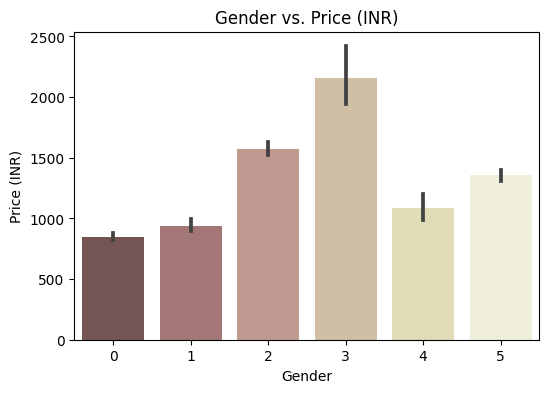

In [151]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Gender", y="Price (INR)", data=df, palette="pink")

plt.xlabel("Gender", fontsize=10)
plt.ylabel("Price (INR)", fontsize=10)
plt.title("Gender vs. Price (INR)", fontsize=12)

plt.show()